<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Aproksimacija</b></font>
<br><br>
<font size="4">
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">April 2017</font>
</center>

# Table of Contents
 <p><div class="lev1"><a href="#Uvod"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></div><div class="lev1"><a href="#Metoda-najmanjših-kvadratov-za-linearno-funkcijo"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metoda najmanjših kvadratov za linearno funkcijo</a></div><div class="lev2"><a href="#Opomba-na-psevdo-inverz"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Opomba na psevdo inverz</a></div><div class="lev1"><a href="#Metoda-najmanjših-kvadratov-za-poljubni-polinom"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda najmanjših kvadratov za poljubni polinom</a></div><div class="lev1"><a href="#Aproksimacija-s-poljubno-funkcijo"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aproksimacija s poljubno funkcijo</a></div><div class="lev2"><a href="#Aproksimacija-s-harmonsko-funkcijo"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Aproksimacija s harmonsko funkcijo</a></div><div class="lev1"><a href="#Aproksimacija-z-zlepki-in-uporabo-SciPy"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aproksimacija z zlepki in uporabo <code>SciPy</code></a></div><div class="lev1"><a href="#Nekaj-vprašanj-za-razmislek!"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1"><a href="#Ekstra"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ekstra</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact

# Uvod

Na predhodnih predavanjih smo si pogledali interpolacijo, ki pa ni vedno ustrezen način popisa manjkajočih vrednosti.

Poglejmo si primer:

In [2]:
n = 50
k = 2.
c = 2.
x = np.linspace(0, 1, n)
np.random.seed(4) # kaj naredi ta metoda ????
y = k*x + c  + np.random.normal(scale=0.25, size=len(x))

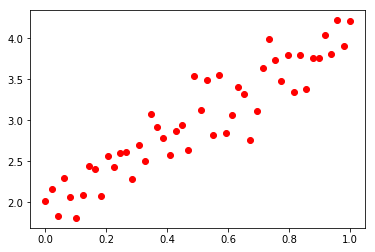

In [3]:
plt.plot(x, y, 'ro');

Očitno je, da so rezultati zgoraj rezultat linearne funkcije, ki je popačena zaradi šuma. Interpolacija (npr s kubičnimi zlepki) podatkov bi tukaj bila (zelo) napačna ideja; dajmo si pogledati zakaj:

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline
spl = InterpolatedUnivariateSpline(x, y) # to ni naravni zlepek - bomo pozneje definirali!
spl1 = spl.derivative(1)
xint = np.linspace(np.min(x), np.max(x), 10*n) #bolj gosti `x`

In [5]:
def slika():
    fig, ax1 = plt.subplots()
    ax1.plot(xint, spl(xint), 'g', lw=3)
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('Interpolacija s kubičnimi zlepki', color='g')

    ax2 = ax1.twinx()
    ax2.plot(xint, spl1(xint), 'r', lw=3)
    ax2.set_ylabel('Odvod interpolacije', color='r')
    plt.show()

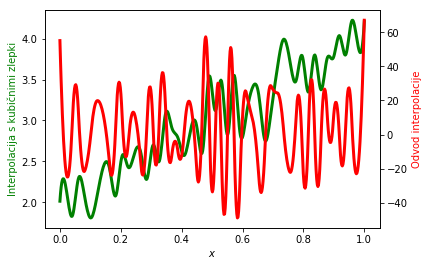

In [6]:
slika()

Opazimo, da je že interpolacija *napačna*, še bolj se pokaže to pri odvodu.

Za konkreten primer zgoraj bi bilo bolje, če bi dane točke poskušali popisati z linearno funkcijo:
$$f(x) = a_0\,x+ a_1$$

Seveda poznamo pare $x_i, y_i$; teh je celo veliko več, kakor jih potrebujemo za določitev dveh konstant. Imamo torej predoločen sistem linearnih enačb. Iz tega razloga moramo najti ustrezne parametre $a_i$, ki se *najbolje* ujemajo z danimi točkami. Najprej torej potrebujemo kriterij za *najboljše* ujemanje. Za vse znane pare $x_i, y_i$ bi lahko iskali takšna parametra $a_0$ in $a_1$ kjer bi bila vsota absolutne vrednosti odstopkov $S$ najmanjša:
$$S = \sum_i |y_i - (a_0\,x_i+a_1)|.$$
Podoben pogoj, ki pa ga je bistveno lažje implementirati je *najmanjše kvadratično odstopanje*:
$$S = \sum_i \left(y_i - (a_0\,x_i+a_1)\right)^2.$$

Poglejmo si sedaj kaj se dogaja z napako, če prilagajamo parametra $a_0$ in $a_1$.

In [7]:
def fig(a0=1, a1=1):
    d=0.1
    def linearna_f(x, a0, a1):
        return a0*x+a1
    def S(x, y, f):
        return np.sum(np.power(y-f,2))
    plt.plot(x,y,'r.')
    linearna_f1 = linearna_f(x, a0, a1)
    plt.plot(x, linearna_f1, 'g-')
    napaka = S(x, y, linearna_f(x, a0, a1))
    sprememba_napake_v_smeri_a0 = (S(x, y, linearna_f(x, a0+d, a1))-napaka)/d
    sprememba_napake_v_smeri_a1 = (S(x, y, linearna_f(x, a0, a1+d))-napaka)/d
    plt.title('Napaka: {0:g}, $\Delta S/\Delta a_0$: {1:g}, $\Delta S/\Delta a_1$: {2:g}'\
              .format(napaka, sprememba_napake_v_smeri_a0, sprememba_napake_v_smeri_a1))
    plt.show()

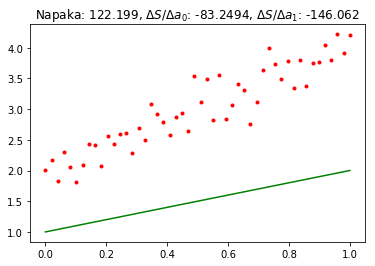

In [8]:
interact(fig, a0=[-0, 3, 0.1], a1=[-0, 3, 0.1]);

# Metoda najmanjših kvadratov za linearno funkcijo

Poiskati moramo konstante $a_0$, $a_1$, da bo napaka
$$S = \sum_i^n \left(y_i - (a_0\,x_i+a_1)\right)^2$$
najmanjša. 

Matematično to pomeni, da mora biti takrat prvi odvod $S$ po konstantah $a_i$ enak nič:
$$\frac{\mathrm{d}S}{\mathrm{d}a_0} = 2\,\sum_i^n \left(y_i - a_0\,x_i-a_1\right)\,(-x_i)$$
In uredimo:
$$\frac{\mathrm{d}S}{\mathrm{d}a_0} =-2\left(\sum_i^n y_i\,x_i -a_0\,\sum_i^n x_i^2- a_1\,\sum_i^n x_i\right)=0$$

Podobno izvedemo še za $a_1$:
$$\frac{\mathrm{d}S}{\mathrm{d}a_1} = 2\,\sum_i^n \left(y_i  - a_0\,x_i- a_1\right)\,(-1)$$
$$\frac{\mathrm{d}S}{\mathrm{d}a_1} = -2\left(\sum_i^n y_i -a_0\,\sum_i^n x_i- a_1\,n\right)=0$$
Opomba: ker je $S$ kvadratna funkcija, smo tako našli minimum!

Izraza uredimo:
$$a_0\,\sum_i^n x_i^2 + a_1\,\sum_i^n x_i=\sum_i^n y_i\,x_i$$
in
$$a_0\,\sum_i^n x_i+ a_1\,n=\sum_i^n y_i$$

Opazimo, da imamo sistem dveh enačb, ki imata dve neznanki ($a_0$ in $a_1$).

Zapišemo torej matriko koeficientov:

In [9]:
A = [[np.sum(x**2), np.sum(x)],
     [np.sum(x), len(x)]]
b = [np.dot(y,x), np.sum(y)]
A = np.asarray(A)
b = np.asarray(b)
print('A:', A)
print('b:', b)

A: [[ 16.83673469  25.        ]
 [ 25.          50.        ]]
b: [  84.30327714  150.53075712]


Sedaj moramo rešiti linearni sistem:
$$\mathbf{A}\,\mathbf{x}=\mathbf{b},$$
ki ga imenujemo tudi *normalni sistem enačb* in bi namesto $\mathbf{x}$ lahko pisali tudi $\mathbf{a}=(a_0, a_1)$.

Sistem rešimo:

In [10]:
a0, a1 = np.linalg.solve(A, b)
a0, a1

(2.0840330834832623, 1.9685986007412886)

Preverimo še pogojenost:

In [11]:
np.linalg.cond(A)

18.547525026929559

Lahko tudi uporabimo ``numpy`` funkcijo

In [12]:
a0_np, a1_np = np.polyfit(x, y, deg=1)
a0_np, a1_np

(2.0840330834832632, 1.9685986007412881)

Še prikažimo

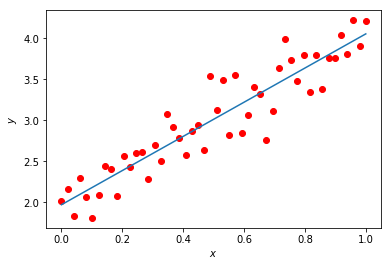

In [13]:
plt.plot(x,y, 'ro');
plt.plot(x, a0*x + a1);
plt.xlabel('$x$')
plt.ylabel('$y$');

## Opomba na psevdo inverz

Do podobnega rezultata lahko pridemo z uporabo psevdo inverza. Iščemo $y(x)=a_0\,x+a_1$ in nastavimo predoločen sistem $\mathbf{A}\,\mathbf{a}=\mathbf{y}$, kjer je matrika koeficientov:

In [14]:
AA=np.array([x, np.ones_like(x)]).T

Da določimo vektor neznank $\mathbf{a}$ izvedmo psevdo inverz:

In [15]:
np.linalg.pinv(AA).dot(y)

array([ 2.08403308,  1.9685986 ])

# Metoda najmanjših kvadratov za poljubni polinom

Linearno aproksimacijo predstavljeni zgoraj, bomo tukaj posplošili za poljubni polinom stopnje $m$:
$$f(x) = \sum_{v}^{m}a_v\,\underbrace{x^{m-v}}_{f_v(x)},$$
kjer $f_v(x)$ imenujemo bazna funkcija.

Napako med aproksimativno funkcijo in podatki definira $S$:
$$S = \sum_i \left(y_i - f(x_i)\right)^2.$$
Iščemo minimum napake, torej mora za vsak $a_v$ veljati:
$$\frac{\mathrm{d}S}{\mathrm{d}a_v} = - 2\,\sum_i^n \left(\left(y_i - f(x_i)\right)\,x_i^{m-v}\right)=0.$$

Enačbo preoblikujemo:
$$\sum_i^n f(x_i)\,x_i^{m-v}=\sum_i^n y_i\,x_i^{m-v},$$
in vpeljemo izraz za $f(x_i)$, pri tem pa v $f(x_i)$ namesto sumacijskega indeksa $v$ uporabimo indeks $s$):

$$\sum_i^n \sum_s^m a_s\,x_i^{2m-s-v}=\sum_i^n y_i\,x_i^{m-v}$$
zamenjamo vrstni red seštevanja:
$$\sum_s^m \left(a_s \sum_i^n \,x_i^{2m-s-v}\right)=\sum_i^n y_i\,x_i^{m-v}.$$

Če dobro pogledamo, smo izpeljali enačbo $v$ sistema $m$ linearnih enačb.
Element $A_{v,s}$ matrike koeficientov je definiran kot:
$$A_{v,s}= \sum_i^n x_i^{2m-v-s},$$
element vektorja neznank kot:
$$x_{s}= a_s$$
in element vektorja konstant kot:
$$b_{v}= \sum_i^n y_i\,x_i^{m-v}$$

Poglejmo si primer polinoma druge stopnje:

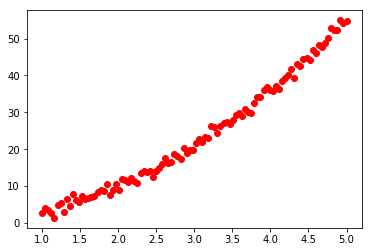

In [16]:
np.random.seed(6) 
x = np.linspace(1, 5, 100)
y = 2.*x**2 + 1.*x + 0. + np.random.normal(size=len(x))
plt.plot(x, y, 'ro');

Izračunajmo matriko koeficientov in vektor konstant

In [17]:
m = 2 #stopnja
A = np.zeros((m+1,m+1))
for v in range(m+1):
    for s in range(m+1):
        A[v,s] = np.sum(x**(2*m-v-s))
b = np.zeros(m+1)
for v in range(m+1):
    b[v] = np.dot(y,x**(m-v))

In [18]:
A

array([[ 15778.47002488,   3924.24242424,   1036.02693603],
       [  3924.24242424,   1036.02693603,    300.        ],
       [  1036.02693603,    300.        ,    100.        ]])

In [19]:
b

array([ 35599.19810329,   8917.02068765,   2382.99712539])

Preverimo pogojenost:

In [20]:
np.linalg.cond(A)

12052.18035533144

in rešimo sistem:

In [21]:
a = np.linalg.solve(A, b)
a

array([ 2.0443683 ,  0.73143145,  0.45547069])

Izračunamo vrednosti z upoštevanjem koeficientov polinoma:

In [22]:
y_app = np.sum(np.asarray([_*x**(m-i) for i,_ in enumerate(a)]), axis=0)

In prikažemo:

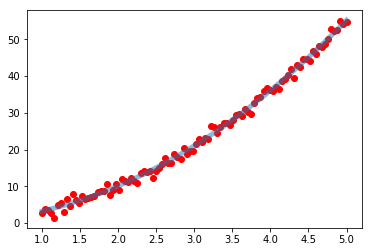

In [23]:
plt.plot(x, y, 'ro')
plt.plot(x, y_app, lw=5, alpha=0.5);

Preverimo še ``numpy`` funkcijo:

In [24]:
np.polyfit(x, y, deg=2)

array([ 2.0443683 ,  0.73143145,  0.45547069])

Opazimo, da je matrika koeficientov lahko hitro slabo pogojena in je posledično tudi aproksimacija slaba. Višje stopnje polinom uporabimo, večja je verjetnost slabe pogojenosti. Iz tega razloga s stopnjo polinoma nima smisla pretiravati (v praksi uporabljamo predvsem nizke stopnje)!

# Aproksimacija s poljubno funkcijo

Kakor smo s pomočjo metode najmanjših kvadratov določili aproksimacijo s polinomsko funkcijo, lahko tudi aproksimiramo z drugimi funkcijami. Izkaže pa se, da hitro dobimo sistem nelinearnih enačb, ki ga v splošnem rešimo numerično. Kako to naredimo, si bomo pogledali ob pomoči ``scipy.optimize.curve_fit``.

## Aproksimacija s harmonsko funkcijo

In [25]:
def func(t, A, w, faza):
    return A*np.sin(w*t+faza)

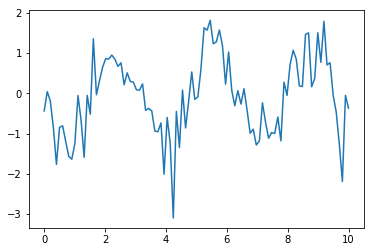

In [26]:
t = np.linspace(0, 10, 100)
y = func(t, 1, 2, 3) + np.random.normal(scale=0.6, size=len(t))
plt.plot(t, y);

Uprabimo sedaj ``curve_fit`` funkcijo:

In [27]:
from scipy.optimize import curve_fit

In [28]:
popt, pcov = curve_fit(func, t, y, p0=[1, 2.3, 1])
popt

array([ 1.14858713,  1.97215761,  3.16890359])

Opazimo, da smo dobili pričakovane vrednosti (glejte zgoraj).

# Aproksimacija z zlepki in uporabo ``SciPy``

Zadnjič smo si pogledali objekt ``InterpolatedUnivariateSpline``, ki v bistvu temelji na bolj splošnem objektu ``UnivariateSpline``. Poglejmo si razliko na primeru:

In [29]:
from scipy.interpolate import UnivariateSpline

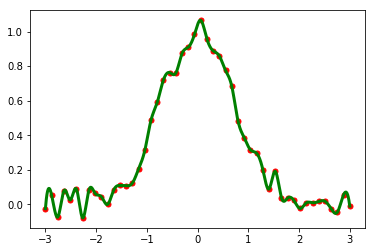

In [30]:
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.normal(scale=.5, size=len(x))
spl = UnivariateSpline(x, y, s=0.)
xs = np.linspace(-3, 3, 1000)
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g', lw=3);

Opazimo, da z uporabo parametra `s=0` v bistvu izvedemo interpolacijo. Razlika med obema objektoma je torej v parametru `s`; poglejmo si pomoč:

* s : float or None, optional

    Positive smoothing factor used to choose the number of knots. Number of knots will be increased until the smoothing condition is satisfied:
        sum((w[i] * (y[i]-spl(x[i])))**2, axis=0) <= s
    If None (default), s = len(w) which should be a good value if 1/w[i] is an estimate of the standard deviation of y[i]. If 0, spline will interpolate through all data points.

Predpostavimo, da je utež `w[i]=1`: če uporabimo parameter `s=0`, bo torej napaka v točkah kjer imamo podatke enaka 0; edini način, da se to izvede je interpolacija skozi vse točke. Če je parameter `s` večji kot nič, potem se število vozlov povečuje dokler ni zadoščenu zgornjemu kriteriju.

In [31]:
spl.get_knots()

array([-3.        , -2.75510204, -2.63265306, -2.51020408, -2.3877551 ,
       -2.26530612, -2.14285714, -2.02040816, -1.89795918, -1.7755102 ,
       -1.65306122, -1.53061224, -1.40816327, -1.28571429, -1.16326531,
       -1.04081633, -0.91836735, -0.79591837, -0.67346939, -0.55102041,
       -0.42857143, -0.30612245, -0.18367347, -0.06122449,  0.06122449,
        0.18367347,  0.30612245,  0.42857143,  0.55102041,  0.67346939,
        0.79591837,  0.91836735,  1.04081633,  1.16326531,  1.28571429,
        1.40816327,  1.53061224,  1.65306122,  1.7755102 ,  1.89795918,
        2.02040816,  2.14285714,  2.26530612,  2.3877551 ,  2.51020408,
        2.63265306,  2.75510204,  3.        ])

0.1000175143499667

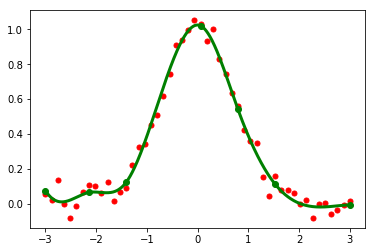

In [32]:
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.normal(scale=.5, size=len(x))
spl = UnivariateSpline(x, y, s=0.1)
xs = np.linspace(-3, 3, 1000)
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g', lw=3);
plt.plot(spl.get_knots(), spl(spl.get_knots()), 'go');
spl.get_residual()

0.1000175143499667
0.5995503444101554


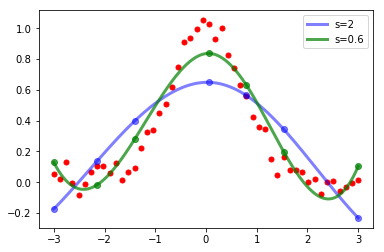

In [33]:
print(spl.get_residual())
plt.plot(x, y, 'ro', ms=5)
spl.set_smoothing_factor(s=2)
plt.plot(xs, spl(xs), 'b', lw=3, alpha=0.5, label='s=2')
plt.plot(spl.get_knots(), spl(spl.get_knots()), 'bo', alpha=0.5, lw=3);
spl.set_smoothing_factor(s=.6)
plt.plot(xs, spl(xs), 'g', lw=3, alpha=0.7, label='s=0.6')
plt.plot(spl.get_knots(), spl(spl.get_knots()), 'go', alpha=0.7, lw=3);
plt.legend()
print(spl.get_residual())

# Nekaj vprašanj za razmislek!


1. Na podatkih:
$$x = [-1.00, -0.50, 0.00, 0.50, 1.00]$$
$$y = [−1.00, −0.55, 0.00, 0.45, 1.00]$$
uporabite linearne zlepke in določite prvi odvod.
* Na zgornjih podatkih izračunajte linearno aproksicijo ter določite parametra aproksimacije.
* Na nateznem testu ste testirali aluminijeve vzorce; rezultati testa so podani spodaj.

    Napetost [MPa]:
$$\sigma = [34.5, 69.0, 103.5, 138.0]$$

    Specifična deformacija [mm/m]
$$vzorec_1 = [0.46, 0.95, 1.48, 1.93]$$
$$vzorec_2 = [0.34, 1.02, 1.51, 2.09]$$
$$vzorec_3 = [0.37, 1.00, 1.51, 2.05]$$
    S pomočjo linearne aproksimacije določite elastični modul (napetost/specifična deformacija) vsakega posameznega vzorca.
* Za Al vzorce zgoraj linearno aproksimirajte elastični modul čez vse vzorce. Določite tudi standardno napako (glejte ``np.std``).
* Raziščite pomoč za funkcijo ``np.polyfit`` in utežite različne vzorce z različno utežjo (npr. da prvi meritvi zaupate manj). Izračunajte nato linearno aproksimiran elastični modul.
* Pojasnite bistvo metode najmanjših kvadratov na primeru linearne aproksimacije. 
* Za podatke:
$$x = [1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7]$$
$$y = [6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828$$
    Pripravite in pojasnite funkcijo za linearno aproksimacijo.
* Nadaljujte zgornjo nalogo in z vgrajeno funkcijo ``np.polyfit`` izvedite linearno, kvadratno in kubično polinomsko aproksimacijo. 
* Nadaljujte zgornjo nalogo in aproksimacije narišite ter določite standarno napako. Katera aproksimacija najbolje popište podatke?
* Definirajte polinom 2 ali 3 stopnje. Dodajte šum (enakomeren ``np.random.rand`` ali normalen ``np.random.randn``) ter nato aproksimirajte s polinomom 1, 2 in 3 stopnje. Vse rezultate narišite in vrednotite rezultat.
* Podatke iz prejšnje točke aproksimirajte s pomočjo kubičnih zlepkov. Uporabite vgrajeno funkcijo in preučite vpliv parametra `s`.

# Ekstra

Naredite *exe* svojega programa:
* https://pypi.python.org/pypi/py2exe/
* http://pinm.ladisk.si/323/kako-iz-python-kodo-prevedem-v-exe-datoteko

Poglejte [pandas paket](http://pandas.pydata.org/)
<img src="http://pandas.pydata.org/_static/pandas_logo.png">